# U.S. Census: 1900 foreign born population by state

In [47]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [48]:
import pandas as pd
import altair as alt
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import squarify

In [58]:
matplotlib.rcParams["font.family"] = ["Roboto", "serif", "Summit Sans"]

In [59]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

---

## Read data

In [60]:
url = "https://raw.githubusercontent.com/stacker-media/data/main/1900-census-immigrant-state/1900-census-immigrant-pop-state.csv"

In [61]:
src = pd.read_csv(url, skiprows=6).drop([0])

#### Clean up

In [62]:
src.columns = (
    src.columns.str.lower()
    .str.replace(" ", "_", regex=False)
    .str.replace(")", "", regex=False)
    .str.replace("(", "", regex=False)
    .str.replace(",", "", regex=False)
)

In [63]:
src.columns = (
    src.columns.str.replace(
        "asia_except_china_japan_and_india", "asia_other", regex=False
    )
    .str.replace("west_indies_except_cuba_and_puerto_rico", "west_indies", regex=False)
    .str.replace("canada_english_includes_newfoundland", "canada_english", regex=False)
    .str.replace("canada_french_includes_newfoundland", "canada_french", regex=False)
)

---

## United States

#### Which birthplace countries were most common in 1900? 

In [64]:
usa_toplines = (
    src[src["states_and_territories"] == "The United States"]
    .melt(
        id_vars="states_and_territories",
        value_vars=[
            "africa",
            "asia_other",
            "atlantic_islands",
            "australia",
            "austria",
            "belgium",
            "bohemia",
            "canada_english",
            "canada_french",
            "central_america",
            "china",
            "cuba",
            "denmark",
            "england",
            "europe_not_otherwise_specified",
            "finland",
            "france",
            "germany",
            "greece",
            "holland",
            "hungary",
            "india",
            "ireland",
            "italy",
            "japan",
            "luxemburg",
            "mexico",
            "norway",
            "pacific_islands_except_phillipine_islands",
            "poland_austrian",
            "poland_german",
            "poland_russian",
            "poland_unknown",
            "portugal",
            "roumania",
            "russia",
            "scotland",
            "south_america",
            "spain",
            "sweden",
            "switzerland",
            "turkey",
            "wales",
            "west_indies",
            "other_countries",
            "born_at_sea",
        ],
        var_name="birthplace",
        value_name="pop",
    )
    .reset_index(drop=True)
)

In [65]:
usa_toplines = usa_toplines.sort_values("pop", ascending=False)

#### Treemap: Top 30 countries for foreign-born U.S. residents

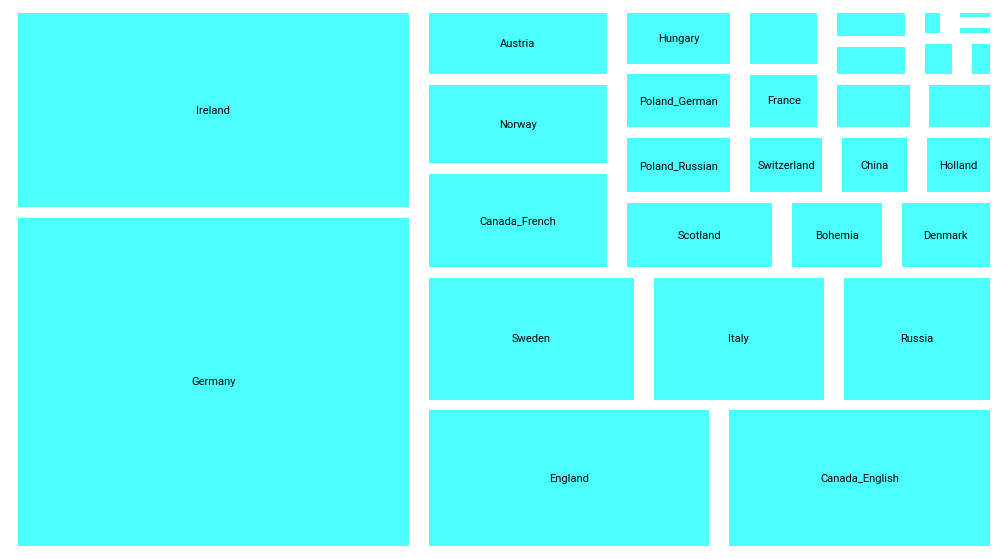

In [66]:
figure(figsize=(16, 9), dpi=80)
squarify.plot(
    sizes=usa_toplines["pop"].head(30),
    norm_x=100,
    norm_y=100,
    label=usa_toplines["birthplace"].head(20).str.title(),
    color=["aqua"],
    alpha=0.7,
    pad=True,
)
plt.axis("off")
plt.show()

---

## States

In [67]:
states_df = src.copy()

In [68]:
states_df.rename(columns={"states_and_territories": "state"}, inplace=True)

In [69]:
states = src.states_and_territories.to_list()

In [70]:
states_df.head()

,state,total_foreign_born,africa,asia_other,atlantic_islands,australia,austria,belgium,bohemia,canada_english,canada_french,central_america,china,cuba,denmark,england,europe_not_otherwise_specified,finland,france,germany,greece,holland,hungary,india,ireland,italy,japan,luxemburg,mexico,norway,pacific_islands_except_phillipine_islands,poland_austrian,poland_german,poland_russian,poland_unknown,portugal,roumania,russia,scotland,south_america,spain,sweden,switzerland,turkey,wales,west_indies,other_countries,born_at_sea
1,The United States,10460085,2577,11928,10955,7041,276702,29848,156999,787798,395427,3911,106659,11159,154616,843491,2272,63440,104534,2669164,8655,105098,145815,2069,1619409,484703,81590,3049,103445,338426,2659,58503,150232,154424,20436,37144,15043,424372,234699,4814,7284,574625,115959,9949,93744,14468,2587,8310
2,Alabama,14592,77,52,1,16,341,45,31,617,80,23,54,55,96,2347,33,28,539,3634,129,42,332,7,1792,862,6,6,43,159,6,18,8,96,11,8,16,468,1223,51,59,488,200,66,306,79,7,26
3,Alaska,12661,3,15,15,60,228,26,8,1501,118,8,3091,2,260,674,9,601,98,1020,36,30,8,4,677,488,279,1,11,1248,17,0,0,0,18,14,0,218,295,20,10,1445,80,12,41,9,19,14
4,Arizona,24233,14,15,4,58,298,33,16,1116,153,25,1298,4,199,1561,3,82,258,1245,10,23,22,8,1159,699,284,3,14172,123,87,4,2,12,4,18,1,107,399,24,51,342,199,29,136,13,1,26
5,Arkansas,14289,14,34,1,16,451,14,281,932,101,14,50,9,185,1894,21,3,387,5971,6,69,97,8,1845,576,0,6,68,51,8,119,108,64,29,0,3,276,342,15,7,355,679,1,113,13,11,34


In [73]:
states_df.columns

Index(['state', 'total_foreign_born', 'africa', 'asia_other',
       'atlantic_islands', 'australia', 'austria', 'belgium', 'bohemia',
       'canada_english', 'canada_french', 'central_america', 'china', 'cuba',
       'denmark', 'england', 'europe_not_otherwise_specified', 'finland',
       'france', 'germany', 'greece', 'holland', 'hungary', 'india', 'ireland',
       'italy', 'japan', 'luxemburg', 'mexico', 'norway',
       'pacific_islands_except_phillipine_islands', 'poland_austrian',
       'poland_german', 'poland_russian', 'poland_unknown', 'portugal',
       'roumania', 'russia', 'scotland', 'south_america', 'spain', 'sweden',
       'switzerland', 'turkey', 'wales', 'west_indies', 'other_countries',
       'born_at_sea'],
      dtype='object')

In [74]:
states_df_melt = states_df.melt(
    id_vars="state",
    value_vars=[
        "africa",
        "asia_other",
        "atlantic_islands",
        "australia",
        "austria",
        "belgium",
        "bohemia",
        "canada_english",
        "canada_french",
        "central_america",
        "china",
        "cuba",
        "denmark",
        "england",
        "europe_not_otherwise_specified",
        "finland",
        "france",
        "germany",
        "greece",
        "holland",
        "hungary",
        "india",
        "ireland",
        "italy",
        "japan",
        "luxemburg",
        "mexico",
        "norway",
        "pacific_islands_except_phillipine_islands",
        "poland_austrian",
        "poland_german",
        "poland_russian",
        "poland_unknown",
        "portugal",
        "roumania",
        "russia",
        "scotland",
        "south_america",
        "spain",
        "sweden",
        "switzerland",
        "turkey",
        "wales",
        "west_indies",
        "other_countries",
        "born_at_sea",
    ],
    var_name="myVarname",
    value_name="myValname",
)

In [75]:
states_df_melt.head()

,state,myVarname,myValname
0,The United States,africa,2577
1,Alabama,africa,77
2,Alaska,africa,3
3,Arizona,africa,14
4,Arkansas,africa,14


---

#### Get historical data for all population — at all geography levels

In [76]:
# County|Parish|Area|Borough|District

historical = pd.read_csv(
    "raw/1900-90_counties_states_population.csv", dtype={"FIPS": str}
)

In [77]:
historical = historical.fillna("").replace("---", "", regex=False)

#### Lowercase columns. We are not savages.

In [78]:
historical.columns = historical.columns.str.lower()

#### Just get the states, not counties, and only the columns we need

In [79]:
total_pop = historical[historical["location"].isin(states)][
    ["fips", "abbreviation", "location", "1990"]
]

In [80]:
total_pop.rename(columns={"location": "state", "1990": "total_pop"}, inplace=True)

In [81]:
total_pop

,fips,abbreviation,state,total_pop
1,01000,AL,Alabama,4040587
69,02000,AK,Alaska,550043
108,04000,AZ,Arizona,3665228
124,05000,AR,Arkansas,2350725
200,06000,CA,California,29760021
259,08000,CO,Colorado,3294394
323,09000,CT,Connecticut,3287116
332,10000,DE,Delaware,666168
338,12000,FL,Florida,12937926
406,13000,GA,Georgia,6478216


---

#### Merge 'em

In [82]:
df = pd.merge(total_pop, states_df, on="state")

In [83]:
len(df)

50

In [84]:
df["total_pop"] = df["total_pop"].astype(int)

In [85]:
df["foreign_born_pct"] = round(((df["total_foreign_born"] / df["total_pop"]) * 100), 2)

In [86]:
df.sort_values("foreign_born_pct", ascending=False)

,fips,abbreviation,state,total_pop,total_foreign_born,africa,asia_other,atlantic_islands,australia,austria,belgium,bohemia,canada_english,canada_french,central_america,china,cuba,denmark,england,europe_not_otherwise_specified,finland,france,germany,greece,holland,...,ireland,italy,japan,luxemburg,mexico,norway,pacific_islands_except_phillipine_islands,poland_austrian,poland_german,poland_russian,poland_unknown,portugal,roumania,russia,scotland,south_america,spain,sweden,switzerland,turkey,wales,west_indies,other_countries,born_at_sea,foreign_born_pct
33,38000,ND,North Dakota,638800,113001,4,54,1,15,1131,154,1445,25001,3102,8,31,0,3958,2909,8,651,251,11546,0,317,...,2670,700,148,39,1,30206,5,226,652,118,58,1,358,14979,1800,8,6,8419,374,104,147,4,13,87,17.69
20,25000,MA,Massachusetts,6016425,846824,139,2140,4432,264,3955,510,810,158753,134416,230,2681,108,2470,82846,15,5104,3905,31395,1843,993,...,249916,28785,78,6,41,3335,94,8166,1532,10936,819,13453,128,26963,24332,275,239,32192,1277,2896,1680,985,209,351,14.08
38,44000,RI,Rhode Island,1003464,134519,123,432,320,47,578,383,41,7744,31583,17,844,16,268,22832,4,132,679,4300,81,69,...,35501,8972,14,0,4,312,13,838,60,849,115,2545,110,2429,5455,47,23,6072,166,284,256,169,164,54,13.41
40,46000,SD,South Dakota,696004,88508,8,101,0,22,926,126,2320,5906,1438,18,150,2,5088,3862,30,1175,262,17873,3,1566,...,3208,360,1,118,18,19788,5,17,299,127,29,2,40,12305,1158,8,3,8647,585,48,549,8,11,84,12.72
22,27000,MN,Minnesota,4375099,505318,89,340,24,81,8872,957,11147,35515,12063,22,153,22,16299,12022,29,10727,1449,117007,75,2717,...,22428,2222,58,430,24,104895,25,877,8181,1379,981,8,483,5907,4810,39,150,115476,3258,125,1288,42,140,357,11.55
26,31000,NE,Nebraska,1578385,177347,20,210,7,59,3803,272,16188,8010,1039,5,190,5,12581,9757,33,37,876,65506,23,885,...,11127,752,9,160,27,2888,15,1157,1305,401,231,6,24,8083,2773,25,182,24698,2340,55,922,26,18,156,11.24
14,19000,IA,Iowa,2776755,305920,28,127,11,111,2309,491,10809,14168,1519,14,102,12,17102,21027,30,47,1905,123162,18,9388,...,28321,1198,11,705,29,25631,21,38,145,457,144,2,84,1998,6425,27,21,29875,4342,93,3091,60,42,315,11.02
31,36000,NY,New York,17990455,1900425,473,1744,461,706,78491,1787,16347,90336,27199,1016,6880,2195,8746,135685,286,4048,20008,480020,1573,9414,...,425553,182248,302,75,353,12601,118,9696,19701,37317,2018,362,10549,165610,33862,1130,1614,42708,13678,1915,7304,4241,339,1001,10.56
48,55000,WI,Wisconsin,4891769,515071,36,173,10,108,7819,4412,14145,23860,10091,16,203,52,16171,17995,78,2198,1687,242777,63,6496,...,23544,2172,5,480,499,61575,13,1368,25607,3307,1507,6,53,4243,4569,57,26,26196,7666,146,3356,27,43,524,10.53
12,17000,IL,Illinois,11430602,966747,131,577,362,412,18212,4394,38570,41466,9129,163,1462,110,15686,64890,158,859,7787,332169,1570,21916,...,114563,23528,102,421,156,29979,70,10291,37491,17083,3081,200,312,28707,20021,181,227,99147,9088,286,4364,218,162,736,8.46


In [89]:
df["top_country"] = df[
    [
        "africa",
        "asia_other",
        "atlantic_islands",
        "australia",
        "austria",
        "belgium",
        "bohemia",
        "canada_english",
        "canada_french",
        "central_america",
        "china",
        "cuba",
        "denmark",
        "england",
        "europe_not_otherwise_specified",
        "finland",
        "france",
        "germany",
        "greece",
        "holland",
        "hungary",
        "india",
        "ireland",
        "italy",
        "japan",
        "luxemburg",
        "mexico",
        "norway",
        "pacific_islands_except_phillipine_islands",
        "poland_austrian",
        "poland_german",
        "poland_russian",
        "poland_unknown",
        "portugal",
        "roumania",
        "russia",
        "scotland",
        "south_america",
        "spain",
        "sweden",
        "switzerland",
        "turkey",
        "wales",
        "west_indies",
        "other_countries",
        "born_at_sea",
    ]
].idxmax(axis=1)

In [90]:
df_slim = df[
    [
        "fips",
        "abbreviation",
        "state",
        "total_pop",
        "total_foreign_born",
        "foreign_born_pct",
        "top_country",
    ]
]

In [91]:
df_slim.sort_values("foreign_born_pct", ascending=False)

,fips,abbreviation,state,total_pop,total_foreign_born,foreign_born_pct,top_country
33,38000,ND,North Dakota,638800,113001,17.69,norway
20,25000,MA,Massachusetts,6016425,846824,14.08,ireland
38,44000,RI,Rhode Island,1003464,134519,13.41,ireland
40,46000,SD,South Dakota,696004,88508,12.72,norway
22,27000,MN,Minnesota,4375099,505318,11.55,germany
26,31000,NE,Nebraska,1578385,177347,11.24,germany
14,19000,IA,Iowa,2776755,305920,11.02,germany
31,36000,NY,New York,17990455,1900425,10.56,germany
48,55000,WI,Wisconsin,4891769,515071,10.53,germany
12,17000,IL,Illinois,11430602,966747,8.46,germany
